# DATA CLEANING
### Fraud Detection System Development using Deep Neural Network for Reported Transactional Data in DANA

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

#### Import Raw CSV File with filtered data source

In [2]:
df = pd.read_csv('user_data_dropped.csv', sep=';')

In [3]:
df.head()

,uid,is_scammer,source,trx_date,report_date,registereddate,birthday,gender,job_position,is_verified,...,dormancy_count_trx,kyc_total_failed,kyc_total_revoked,avg_topup_weight_1,avg_x2x_weight_1,avg_other_weight_1,centrality_outdegree_p2p,centrality_indegree_p2p,centrality_undirected_p2p,centrality_outdegree_sendmoney
0,640d7332-34f5-45bd-8404-65f72417fadc,1,CS_REPORT_SCAMMER,19/04/2022,21/04/2022,01/04/2022,NaN,NaN,NaN,0,...,7,NaN,NaN,0,0,0,0.0,0.0,0.0,0.0
1,640d7332-34f5-45bd-8404-65f72417fadc,1,CS_REPORT_SCAMMER,19/04/2022,21/04/2022,01/04/2022,NaN,NaN,NaN,0,...,7,NaN,NaN,0,0,0,0.0,0.0,0.0,0.0
2,640d7332-34f5-45bd-8404-65f72417fadc,1,CS_REPORT_SCAMMER,19/04/2022,21/04/2022,01/04/2022,NaN,NaN,NaN,0,...,7,NaN,NaN,0,0,0,0.0,0.0,0.0,0.0
3,640d7332-34f5-45bd-8404-65f72417fadc,1,CS_REPORT_SCAMMER,19/04/2022,21/04/2022,01/04/2022,NaN,NaN,NaN,0,...,7,NaN,NaN,0,0,0,0.0,0.0,0.0,0.0
4,640d7332-34f5-45bd-8404-65f72417fadc,1,CS_REPORT_SCAMMER,19/04/2022,21/04/2022,01/04/2022,NaN,NaN,NaN,0,...,7,NaN,NaN,0,0,0,0.0,0.0,0.0,0.0


In [4]:
df.isna().sum()

uid                                   0
is_scammer                            0
source                                0
trx_date                              0
report_date                           0
registereddate                       91
birthday                           5915
gender                             5626
job_position                       5915
is_verified                           0
aqc_freq_prepaid_mobile               0
aqc_mean_prepaid_mobile_amount        0
aqc_freq_topup                        0
aqc_freq_topup_within_7d              0
aqc_mean_topup_amount                 0
aqc_mean_topup_amount_7d              0
aqc_mean_topup_amount_30d             0
aqc_mean_topup_amount_90d             0
aqc_total_topup_amount_7d             0
aqc_total_topup_amount_90d            0
aqc_freq_x2x                          0
aqc_freq_x2x_within_60d               0
aqc_freq_x2x_within_90d               0
aqc_mean_x2x_amount                   0
aqc_mean_x2x_amount_7d                0


#### Begin Cleaning Here

In [5]:
# Drop uid column
df1 = df.drop(columns=['uid'])

In [6]:
# Change df['source'] null to 'none'
df1['source'] = df1['source'].fillna('none')

In [7]:
# One-hot Encoding for df['source']
df1['source'].value_counts()

CS_REPORT_SCAMMER               12577
CS_REPORT_VICTIM                11353
INCOMPLETE_CS_REPORT_VICTIM     10367
INCOMPLETE_CS_REPORT_SCAMMER     8562
Name: source, dtype: int64

In [8]:
# df['trx_date'] change to integer
df1['trx_date'] = pd.to_datetime(df1['trx_date'])
df1['trx_date'] = (df1['trx_date'] - np.datetime64(0, 'Y')).dt.days

In [9]:
# df['report_date'] null to np.datetime64('1970')
# df['report_date'] change to integer
df1['report_date'] = pd.to_datetime(df1['report_date'])
df1['report_date'] = (df1['report_date'] - np.datetime64(0, 'Y')).dt.days

In [10]:
# df['registereddate'] null to np.datetime64('1970')
# df['registereddate'] change to integer
df1['registereddate'] = df1['registereddate'].fillna(np.datetime64(0, 'Y'))
df1['registereddate'] = pd.to_datetime(df1['registereddate'])
df1['registereddate'] = (df1['registereddate'] - np.datetime64(0, 'Y')).dt.days

In [11]:
# Handle corrupt birthday data '#'*256
# df['birthday'] null to np.datetime64('0000')
# df['birthday'] change to integer
df1['birthday'] = df1['birthday'].replace('#'*255, np.datetime64('0000'))
df1['birthday'] = df1['birthday'].fillna(np.datetime64('0000'))
df1['birthday'] = pd.to_datetime(df1['birthday'])
df1['birthday'] = (df1['birthday'] - np.datetime64(0, 'Y')).dt.days

In [12]:
# df['gender'] null to 'Null'
df1['gender'] = df1['gender'].fillna('Null')

In [13]:
# df['dormancy_max_gmt_pay_diff_days'] null --> 0
# df['dormancy_mean_gmt_pay_diff_days'] null --> 0
df1['dormancy_max_gmt_pay_diff_days'] = df1['dormancy_max_gmt_pay_diff_days'].fillna(0)
df1['dormancy_mean_gmt_pay_diff_days'] = df1['dormancy_mean_gmt_pay_diff_days'].fillna(0)

In [14]:
# df['kyc_total_failed'] null --> 0
# df['kyc_total_revoked'] null --> 0
df1['kyc_total_failed'] = df1['kyc_total_failed'].fillna(0)
df1['kyc_total_revoked'] = df1['kyc_total_revoked'].fillna(0)

In [15]:
# df['job_position'] perbaiki typo
# df['job_position'] null --> 'LAINNYA'
# df['job_position'] kelompokkan menjadi RumahTangga, Pelajar, TidakBekerja, Wiraswasta, Spesialis, Karyawan, PegawaiNS, Lainnya
# 159 --> 8 Unique job entries
df2 = df1.copy()

In [16]:
df2['job_position'] = df2['job_position'].fillna('LAINNYA')
df2['job_position'] = df2['job_position'].str.replace(" ", "")
df2['job_position'] = df2['job_position'].str.replace("/", "")

karyawan = [r'(.*(?:KARYAWAN).*)', r'(.*(?:BURUH).*)', 'PILOT', 'PELAUT', 'PETANIPEKEBUN', 'PETERNAK', 'NELAYANPERIKANAN', 'SOPIR', 'AKUNTAN', 'TRANSPORTASI', 'PENATARIAS', 'PENATARAMBUT', 'PENATABUSANA', 'PENGEMUDI', 'PENYIARTELEVISI', 'PENYIARRADIO']
tidak_kerja = [r'(.*(?:TIDAK).*)', r'(.*(?:BELUM).*)', 'PENSIUNAN', 'PENSIUN']
pelajar = [r'(.*(?:PELAJAR).*)']
wiraswasta = [r'(.*(?:SWASTA).*)', r'(.*(?:WIRA).*)', 'PERDAGANGAN', 'INDUSTRI', 'KONSTRUKSI', 'PEDAGANG', 'WIASRWASTA']
spesialis = [r'(.*(?:TUKANG).*)', 'GURU', 'DOSEN', 'BIDAN', 'DOKTER', 'WARTAWAN', 'APOTEKER', 'PERAWAT', 'PENGACARA', 'PENELITI', 'PARAJI', 'KONSULTAN', 'PERANCANGBUSANA', 'HAKIM', 'ARSITEK', 'PENTERJEMAH', 'JURUMASAK', 'MEKANIK', 'NOTARIS']
pns = [r'(.*(?:BUMN).*)', r'(.*(?:BUMD).*)', r'(.*(?:ANGGOTA).*)', 'PERANGKATDESA', 'PEGAWAINEGERISIPIL', 'KEPOLISIANRI', 'GUBERNUR', 'TENTARANASIONALINDONESIA', 'KEPALADESA', 'WALIKOTA', 'BUPATI', 'DUTABESAR']
rumahtangga = [r'(.*(?:RUMAH).*)']
lainnya = [r'(.*(?:LAIN).*)', r'^[A-Z0-9]{0,3}$', 'SENIMAN', 'TABIB', 'USTADZMUBALIGH', 'OHTERS', 'OTHERS', 'PASTUR', 'PARANORMAL', 'PIALANG', 'IMAMMASJID', 'PENDETA', 'BIARAWATI']

df2['job_position'] = df2['job_position'].replace(lainnya, 'LAINNYA', regex = True)
df2['job_position'] = df2['job_position'].replace(pns, 'PEGAWAI_NS', regex = True)
df2['job_position'] = df2['job_position'].replace(pelajar, 'PELAJAR', regex = True)
df2['job_position'] = df2['job_position'].replace(karyawan, 'KARYAWAN', regex = True)
df2['job_position'] = df2['job_position'].replace(wiraswasta, 'WIRASWASTA', regex = True)
df2['job_position'] = df2['job_position'].replace(spesialis, 'SPESIALIS', regex = True)
df2['job_position'] = df2['job_position'].replace(rumahtangga, 'RUMAH_TANGGA', regex = True)
df2['job_position'] = df2['job_position'].replace(tidak_kerja, 'TIDAK_KERJA', regex = True)

In [17]:
print(df2['job_position'].value_counts())
print("Unique Job Positions: ", len(df2['job_position'].unique()))

PELAJAR         16845
LAINNYA          6250
KARYAWAN         6158
RUMAH_TANGGA     5421
TIDAK_KERJA      4574
WIRASWASTA       3086
PEGAWAI_NS        288
SPESIALIS         237
Name: job_position, dtype: int64
Unique Job Positions:  8


#### Display Relational HeatMap of Cleaned Data

In [18]:
df3 = df2.copy()
categorical_columns = ['source','gender','job_position']
df3 = pd.get_dummies(df3, columns = categorical_columns)

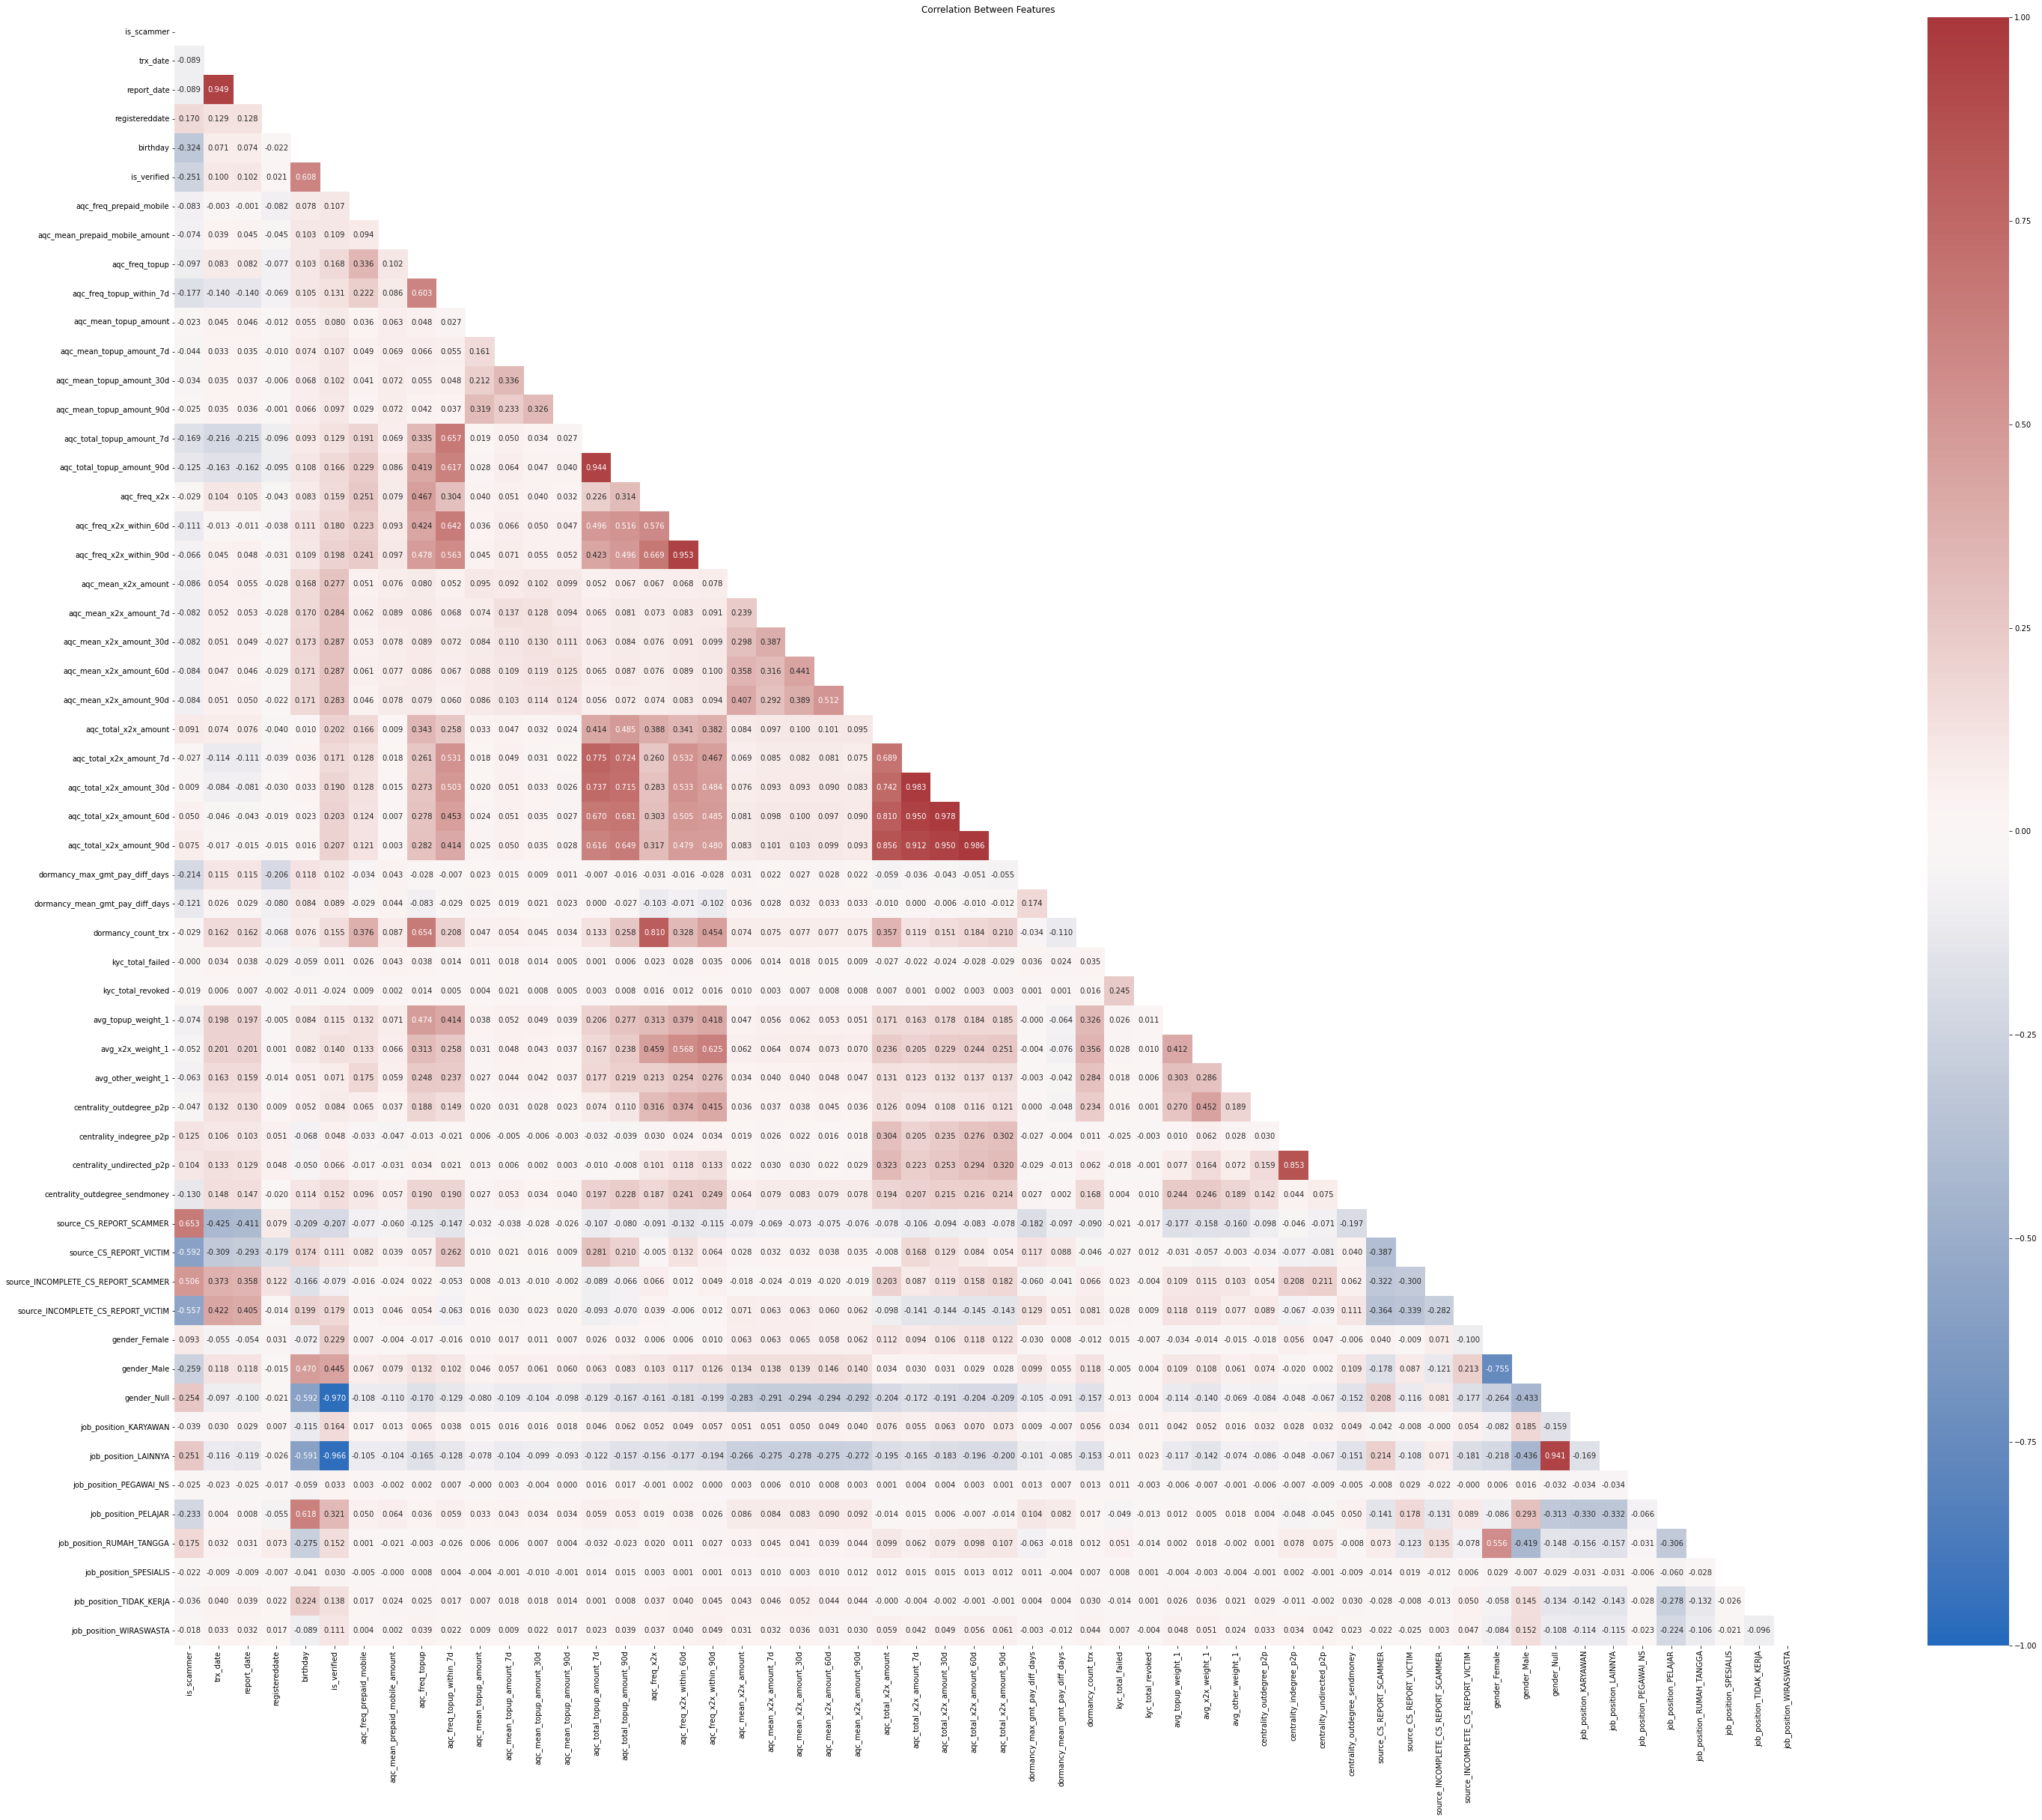

In [19]:
# Check Correlation of Features, then Make Relational Map
corr_column = df3.select_dtypes(include=[np.number]).columns.to_list()

fig = plt.figure(figsize=(60,40))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Features')

mask = np.triu(np.ones_like(
    df3[corr_column].corr(), dtype=np.bool))

sns.heatmap(df3[corr_column].corr(),
            vmin=-1, vmax=1, cmap='vlag', annot=True, fmt='.3f', mask=mask,
            annot_kws = {'fontsize': 10, 'fontweight':'roman'},
            square=True)

plt.show()

In [20]:
# Another Visual Representation
score_corr = df3[corr_column].corr()
score_corr.style.background_gradient(cmap='vlag')

#### Re-Add uid Column, Save as CSV.
##### Uncomment to run

In [21]:
# df4 = df3.copy()
# df4['uid'] = df['uid']
# df4.to_csv("user_data_clean_ori.csv", index=False)